In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib widget

In [2]:
data=pd.read_csv("fot.dat", sep=",")

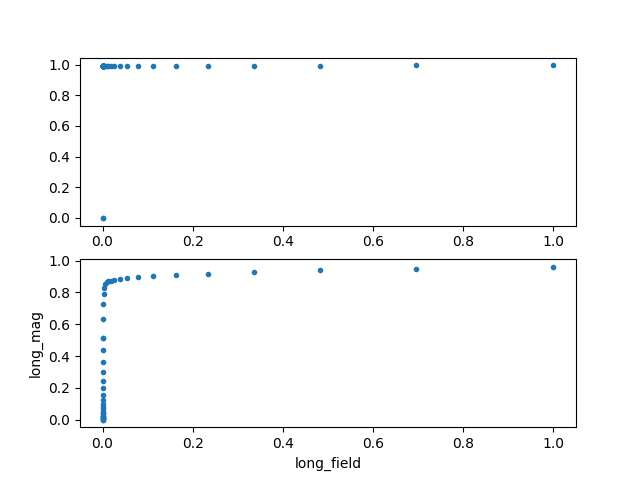

In [3]:
L=11
gs=[0.2777777777777778, 0.8222222222222222] #, 0.9]


fig1, ax1= plt.subplots(len(gs),1)

for i in range(len(gs)):
    filtered_data=data[(data["L"]==L)&(data["g"]==gs[i])]
    ax1[i].plot(filtered_data['h'], filtered_data['long_mag'],marker="." , ls="")
# for L in range(4,8):
#     filtered_data1=data[data["L"] == L]
#     filtered_data2=filtered_data1[filtered_data1["g"]== 0.5]
#     plt.plot(filtered_data2['h'], filtered_data2['long_mag'],marker="." , ls="")
plt.xlabel("long_field")
plt.ylabel("long_mag")
plt.show()

In [4]:
def Delta_0(L,g,data):
    filtered_data=data[(data["L"]==L)&(data["g"]==g)&(data["h"]==0)]
    E_1=filtered_data.iat[0,data.columns.get_loc("E_1")]
    E_0=filtered_data.iat[0,data.columns.get_loc("E_0")]
    return E_1-E_0

In [5]:
g=0.2
Ls=range(3,12)
ys=np.array([Delta_0(L,g,data) for L in Ls])

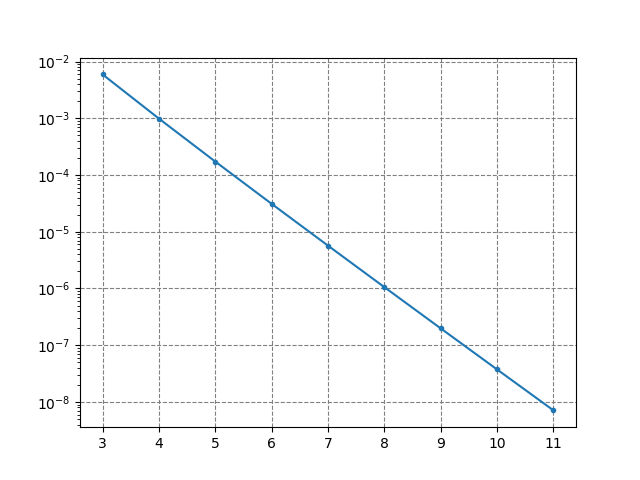

In [6]:
fig2,ax2=plt.subplots()
plt.plot(Ls,ys, marker=".")
plt.yscale("log")
plt.grid(color="gray", ls="--")
plt.show()

In [7]:
Ls= np.sort(data["L"].unique())
gs= np.sort(data["g"].unique())
cs=[]
def model (L,A,c):
    return A*np.exp(-c*L)
from scipy.optimize import curve_fit
for g in gs:
    ys=[Delta_0(L,g,data) for L in Ls]
    popt, pcov= curve_fit(model, Ls, ys)
    cs.append(popt[1])
print(cs)

[1.7904637051219923, 1.4607499346840465, 1.2123200867948722, 1.012626831549052, 0.8677323599474829, 0.8454384853115033, 0.8353719317026393, 0.8039878988693898, 0.7735209233037416, 0.7439168758068143, 0.7151264684288089, 0.7014527549559811, 0.6871045465356617, 0.6598101555112601, 0.6332062130233395, 0.6072592195815785, 0.5819401485893873, 0.5748680457527303, 0.557223018070589, 0.5330857547564964, 0.5095113463003266, 0.48648615710423204, 0.46400122727988563, 0.46216480018004347, 0.4420520053859363, 0.4206380607910449, 0.39976357945897584, 0.37943639123783496, 0.3619750208088143, 0.3596678872937747, 0.3404726685234294, 0.3218673103598709, 0.3038706163724064, 0.2865014232001507, 0.27504432441385857, 0.2697785838522489, 0.25371982515720565, 0.23834134436211643, 0.22365506312877984, 0.2096705618676355]


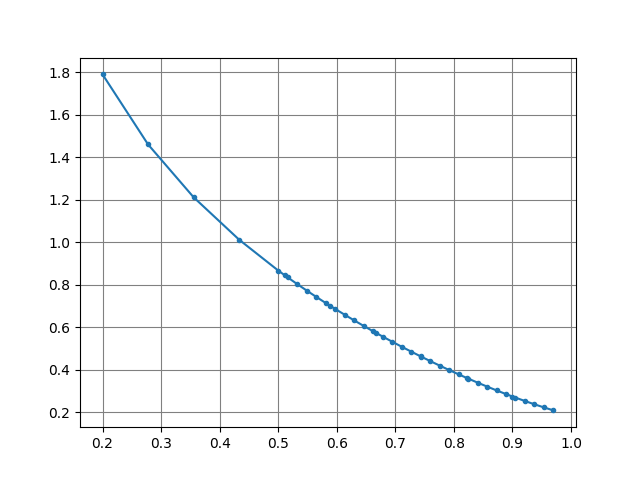

In [11]:
fig3,ax3=plt.subplots()
plt.grid(color="gray")
plt.plot(gs,cs, marker=".")

plt.show()

In [12]:
def long_mag_0(g):
    return (1-g**2)**0.125
def K(L,g,h,data):
    num=long_mag_0(g)*L*h
    den=Delta_0(L,g,data)
    return num/den

In [13]:
Ks=[]
ys=[]
for index, row in data.iterrows():
    L=row["L"]
    g=row["g"]
    h=row["h"]
    long_mag=row["long_mag"]
    newK=K(L,g,h,data)
    newy=long_mag_0(g)
    Ks.append(newK)
    ys.append(newy)

In [16]:
print(ys)

[0.9949102475942003, 0.9949102475942003, 0.9949102475942003, 0.9949102475942003, 0.9949102475942003, 0.9949102475942003, 0.9949102475942003, 0.9949102475942003, 0.9949102475942003, 0.9949102475942003, 0.9949102475942003, 0.9949102475942003, 0.9949102475942003, 0.9949102475942003, 0.9949102475942003, 0.9949102475942003, 0.9949102475942003, 0.9949102475942003, 0.9949102475942003, 0.9949102475942003, 0.9949102475942003, 0.9900127147044108, 0.9900127147044108, 0.9900127147044108, 0.9900127147044108, 0.9900127147044108, 0.9900127147044108, 0.9900127147044108, 0.9900127147044108, 0.9900127147044108, 0.9900127147044108, 0.9900127147044108, 0.9900127147044108, 0.9900127147044108, 0.9900127147044108, 0.9900127147044108, 0.9900127147044108, 0.9900127147044108, 0.9900127147044108, 0.9900127147044108, 0.9900127147044108, 0.9900127147044108, 0.9832474995960806, 0.9832474995960806, 0.9832474995960806, 0.9832474995960806, 0.9832474995960806, 0.9832474995960806, 0.9832474995960806, 0.9832474995960806,

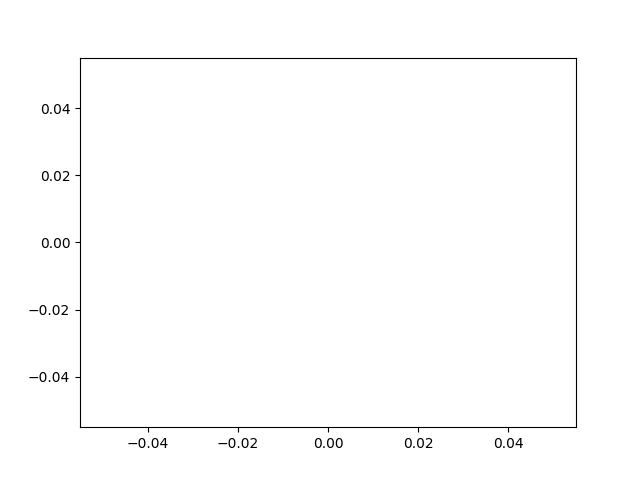

In [14]:
fig4,ax4=plt.subplots()
plt.scatter(Ks,ys, marker=".")
plt.show()